# Project: Bank Marketing (Campaign) -- Group Project

Group Name: Kesimoji   
Names: Kemal Cagin Sertkaya, Jinwen Li, Mohamed Elmorsy, Sirui Zhang   
Emails: cagin24@gmail.com, jinwen@uw.edu, mmsobhy7@gmail.com, zhangsirui261918@126.com   
Colleges: Bogazici University, University of Washington, Mcmaster University, UCL   
Specialization: Data Science  
Countries: Turkey, US, Canada, UK   
 

### Problem description:
One bank wants to sell its term deposit product to customers before launching the product. To save their resource and time, they want to know what kind of customers they should focus on, and then they can put more advertisements to these customers, who have more chances of buying the product. Thus, our problem is to pick up this kind of customer, based on customers’ past interaction with this bank or other financial institutions. We are going to use the customers’ data to build some machine learning models and then, select customers who most likely buy the product. 


### Data cleansing and transformation done on the data.



### 1. Load Data

In [2]:
# Import packages
import pandas as pd
from pandas import factorize
import numpy as np
import os, glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sb
plt.rcParams.update(plt.rcParamsDefault)
import calendar

In [3]:
# Define functions
def prob(x):
    x = round(x.div(len(data))*100, 2)
    return x

In [4]:
# load data
data = pd.read_csv("/Users/jinwen/Downloads/data_glacier_6-9/bank/bank-full.csv", sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 2. Explore Data

In [5]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
col = data.columns.tolist()
col_num = data.select_dtypes(include=np.number).columns.tolist()

In [7]:
print("Number of unique values stat:")
data.nunique()

Number of unique values stat:


age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [8]:
x = prob(data.isnull().sum())
print("Percentage of null values in data: ")
x

Percentage of null values in data: 


age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [24]:
data.describe().applymap('{:,.0f}'.format)

,age,balance,day,duration,campaign,pdays,previous
count,"7,842","7,842","7,842","7,842","7,842","7,842","7,842"
mean,41,"1,552",14,261,2,223,3
std,11,"3,085",8,236,2,112,5
min,18,"-1,884",1,5,1,1,1
25%,32,162,7,113,1,133,1
50%,38,595,14,194,2,195,2
75%,47,"1,734",20,324,2,326,4
max,89,"81,204",31,"2,219",16,871,275


### 2. Outliers Removal

In order to detect and remove outliers, here we use two statistical methods: Interquartile range(IQR) and Standard Deviation.

In [10]:
# Outliers removal using Interquartile range(IQR) statistical method
def outliers_iqr(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

for col in col_num:
    upper, lower = outliers_iqr(data, col)
    print(str(col)+":")
    print("Upper limit: ", upper)
    print("Lower limit: ", lower)
    if upper > lower:
        data_iqr = data[(data[col] > lower) & (data[col] < upper)]

data_iqr.describe().applymap('{:,.0f}'.format)

age:
Upper limit:  70.5
Lower limit:  10.5
balance:
Upper limit:  3462.0
Lower limit:  -1962.0
day:
Upper limit:  40.5
Lower limit:  -11.5
duration:
Upper limit:  643.0
Lower limit:  -221.0
campaign:
Upper limit:  6.0
Lower limit:  -2.0
pdays:
Upper limit:  -1.0
Lower limit:  -1.0
previous:
Upper limit:  0.0
Lower limit:  0.0


,age,balance,day,duration,campaign,pdays,previous
count,"40,856","40,856","40,856","40,856","40,856","40,856","40,856"
mean,41,"1,369",15,265,2,42,1
std,11,"3,053",8,258,1,102,2
min,18,"-8,019",1,0,1,-1,0
25%,33,76,8,109,1,-1,0
50%,39,455,15,187,2,-1,0
75%,48,"1,440",21,326,3,-1,0
max,95,"102,127",31,"4,918",5,871,275


In [11]:
# Outliers removal using Standard Deviation statistical method
def outlier_std(df, variable):
    upper_limit = df[variable].mean() + 3 * df[variable].std()
    lower_limit = df[variable].mean() - 3 * df[variable].std()
    return upper_limit, lower_limit
    
for col in col_num: 
    upper_limit, lower_limit = outlier_std(data, col)
    print(str(col)+":")
    print("Upper limit: ", upper_limit)
    print("Lower Limit: ",lower_limit)
    data_std = data[(data[col] > lower_limit) & (data[col] < upper_limit)]

data_std.describe().applymap('{:,.0f}'.format)

age:
Upper limit:  72.79249633725466
Lower Limit:  9.079924091402077
balance:
Upper limit:  10496.569545190878
Lower Limit:  -7772.025429820724
day:
Upper limit:  40.77384725101949
Lower Limit:  -9.161009667245626
duration:
Upper limit:  1030.746516576982
Lower Limit:  -514.4203570140437
campaign:
Upper limit:  12.057903308087548
Lower Limit:  -6.530221991593775
pdays:
Upper limit:  340.5840659340357
Lower Limit:  -260.18841000959253
previous:
Upper limit:  7.490646507424825
Lower Limit:  -6.329999762163715


,age,balance,day,duration,campaign,pdays,previous
count,"44,629","44,629","44,629","44,629","44,629","44,629","44,629"
mean,41,"1,360",16,258,3,38,0
std,11,"3,050",8,258,3,98,1
min,18,"-8,019",1,0,1,-1,0
25%,33,71,8,103,1,-1,0
50%,39,446,16,180,2,-1,0
75%,48,"1,420",21,319,3,-1,0
max,95,"102,127",31,"4,918",63,871,7


### 3.Process of NA values

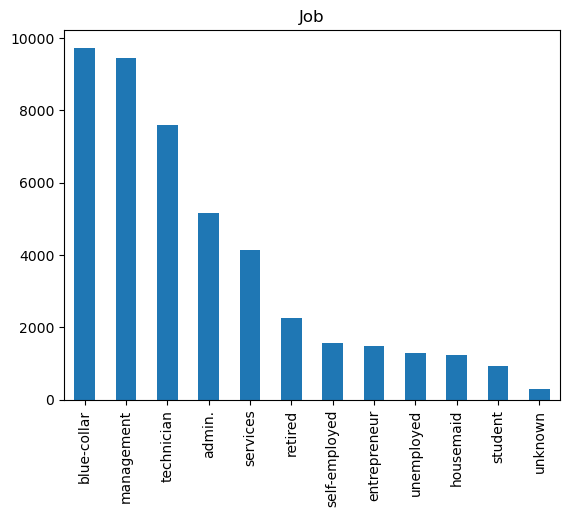

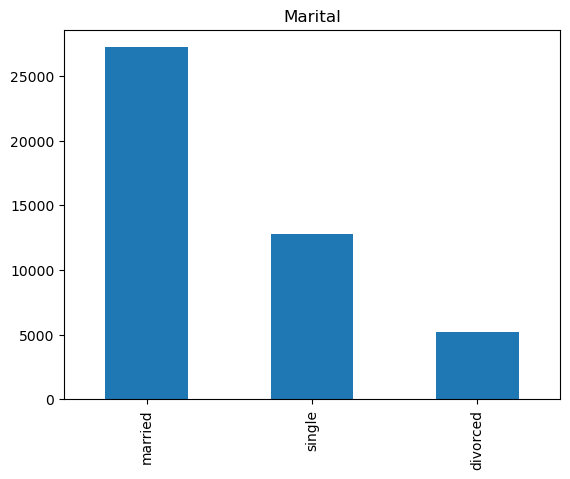

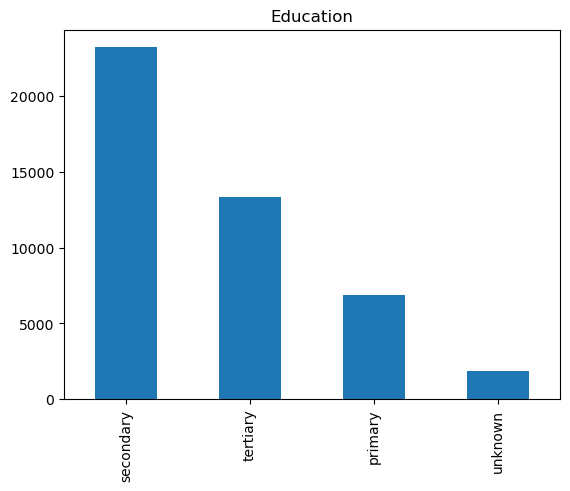

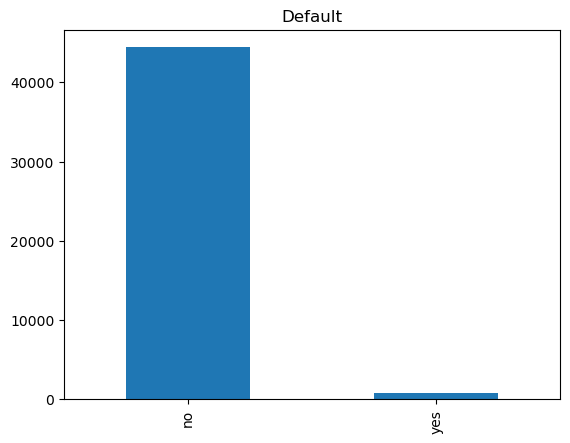

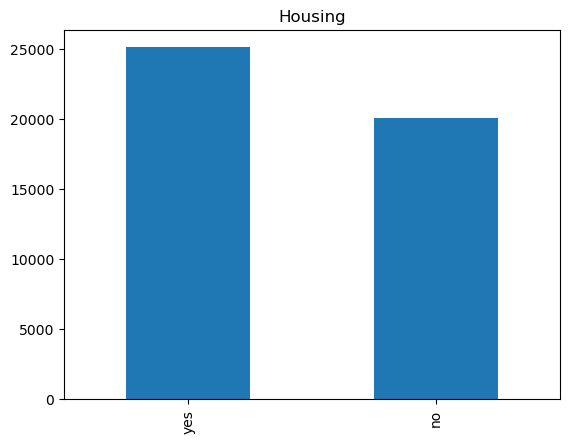

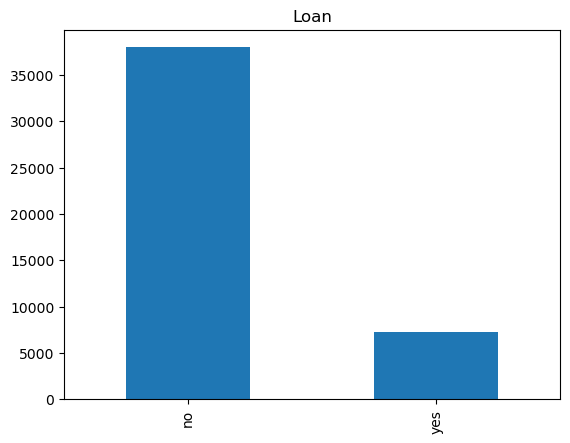

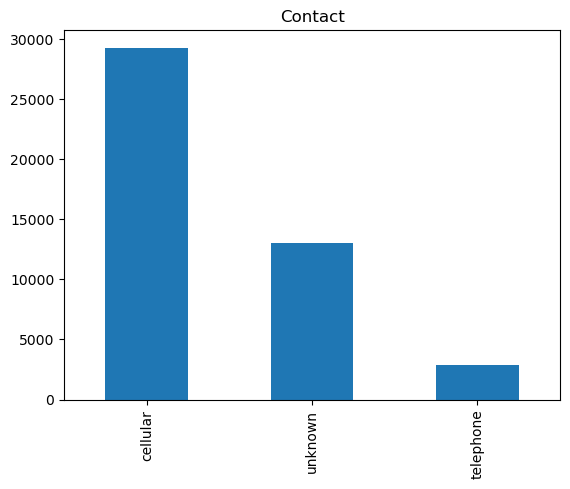

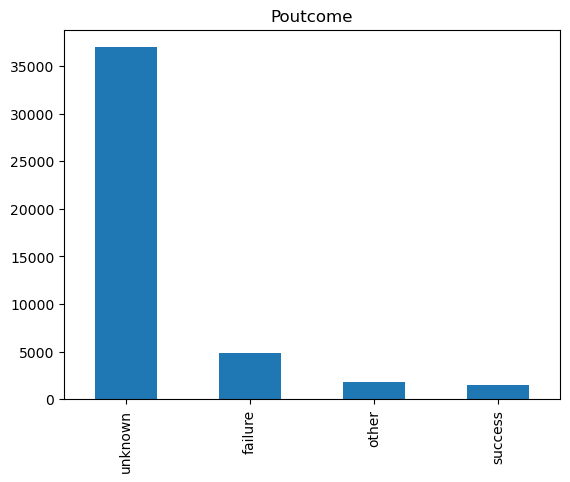

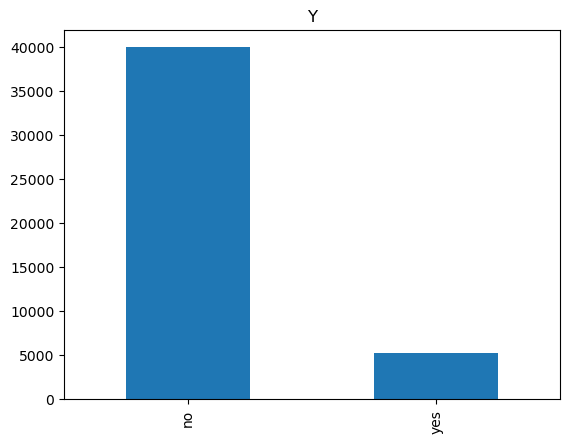

In [12]:
#Process of NA Values

plt.title('Job')
data.job.value_counts().plot(kind='bar')
plt.show()
plt.title('Marital')
data.marital.value_counts().plot(kind='bar')
plt.show()
plt.title('Education')
data.education.value_counts().plot(kind='bar')
plt.show()
plt.title('Default')
data.default.value_counts().plot(kind='bar')  
plt.show()
plt.title('Housing')
data.housing.value_counts().plot(kind='bar')
plt.show()
plt.title('Loan')
data.loan.value_counts().plot(kind='bar')
plt.show()
plt.title('Contact')
data.contact.value_counts().plot(kind='bar')
plt.show()
plt.title('Poutcome')
data.poutcome.value_counts().plot(kind='bar')
plt.show()
plt.title('Y')
data.y.value_counts().plot(kind='bar')
plt.show()


In [13]:
# There is no null value. However there are unknown values as we can see above. 
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
#unknown values
strings = [x for x in data.columns if type(data[x].loc[data[x].first_valid_index()])==str]

for columns in strings:
  print(columns, ':', len(data[data[columns].str.contains('unknown')]))

job : 288
marital : 0
education : 1857
default : 0
housing : 0
loan : 0
contact : 13020
month : 0
poutcome : 36959
y : 0


In [15]:
data_copy=data

In [16]:
#There are 288 unknown in Job column, 1857 in education, 13020 in contact and 36959 in poutcome
data['job'] = data['job'].replace(['unknown'],np.nan)
data['education'] = data['education'].replace(['unknown'],np.nan)
data['contact'] = data['contact'].replace(['unknown'],np.nan)
data['poutcome'] = data['poutcome'].replace(['unknown'],np.nan)

In [17]:
# method 1 for NA(drop NA)
data=data.dropna()

In [18]:
data.isnull().mean().sum()

0.0

In [19]:
# method 2 for NA(using mode value to fill NA)
data_copy['job'].fillna(data_copy['job'].mode())


0          management
1          technician
2        entrepreneur
3         blue-collar
4                 NaN
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object

In [20]:
data_copy['education'].fillna(data_copy['education'].mode())

0         tertiary
1        secondary
2        secondary
3              NaN
4              NaN
           ...    
45206     tertiary
45207      primary
45208    secondary
45209    secondary
45210    secondary
Name: education, Length: 45211, dtype: object

In [21]:
data_copy['contact'].fillna(data_copy['contact'].mode())
data_copy['poutcome'].fillna(data_copy['poutcome'].mode())

0        failure
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
45206        NaN
45207        NaN
45208    success
45209        NaN
45210      other
Name: poutcome, Length: 45211, dtype: object

### 4. Exploratory Data Report

In [88]:
df=data_copy
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        44923 non-null  object  
 2   marital    45211 non-null  object  
 3   education  43354 non-null  object  
 4   default    45211 non-null  object  
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  object  
 7   loan       45211 non-null  object  
 8   contact    32191 non-null  object  
 9   day        45211 non-null  int64   
 10  month      45211 non-null  object  
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   8252 non-null   object  
 16  y          45211 non-null  object  
 17  DurGroup   45211 non-null  category
dtypes: category(1), int64(7), object(10)
memory usage: 5.9+ MB


In [27]:
def Box_plots(df,clr):
  plt.figure(figsize=(10,4))
  plt.title("Box Plot")
  sns.boxplot(df, color= clr)
  plt.show()

def hist_plots(df,clr):
  plt.figure(figsize=(10,4))
  plt.hist(df, color =clr)
  plt.title("Histogram Plot")
  plt.show()

def dist_plots(df,clr):
  plt.figure(figsize=(10,4))
  plt.title("Distribution Plot")
  sns.distplot(df,color= clr)
  sns.despine()
  plt.show()

### For age column

/Users/jinwen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


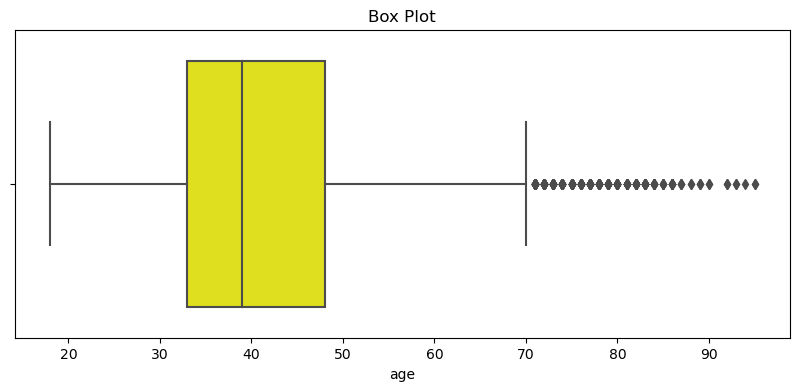

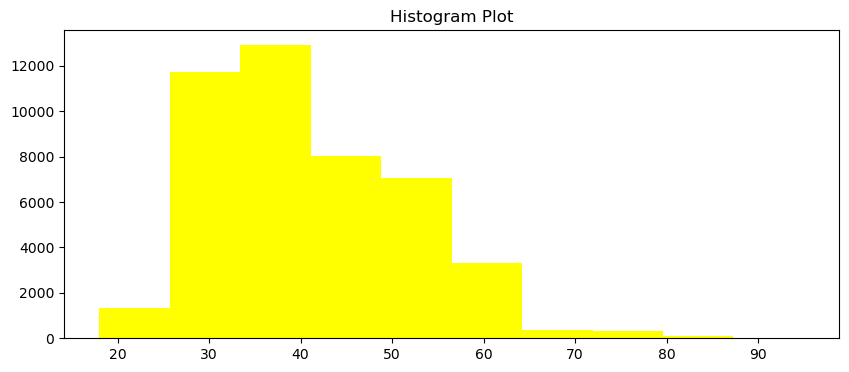

/Users/jinwen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


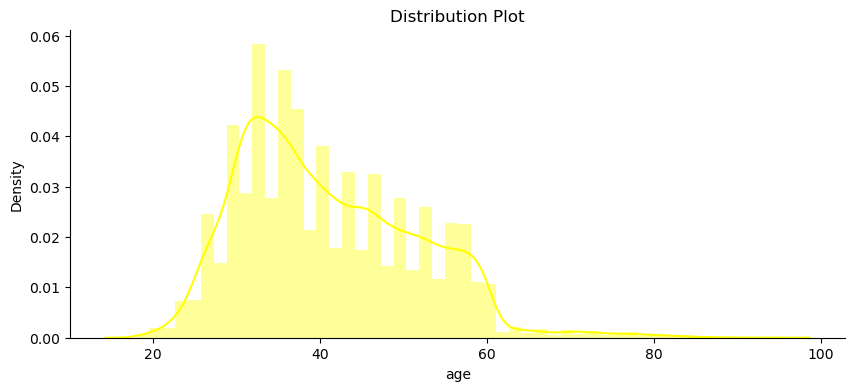

In [30]:
Box_plots(df["age"],"yellow")
hist_plots(df["age"],"yellow")
dist_plots(df["age"],"yellow")

### For balance column

/Users/jinwen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


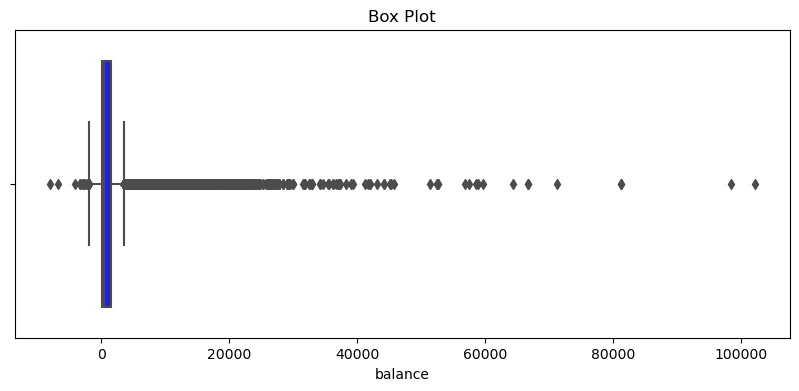

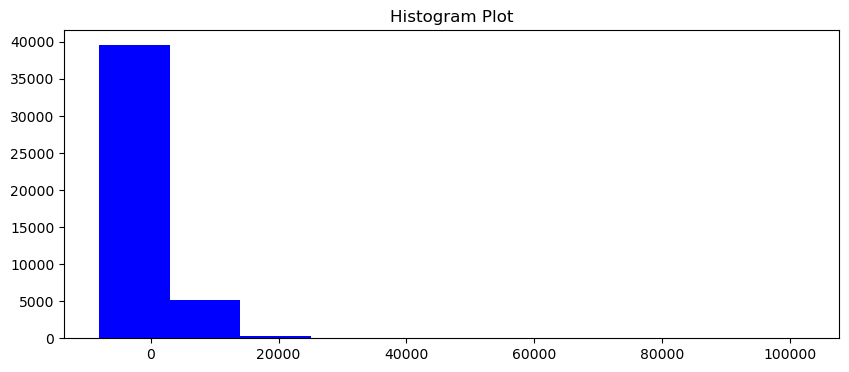

/Users/jinwen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


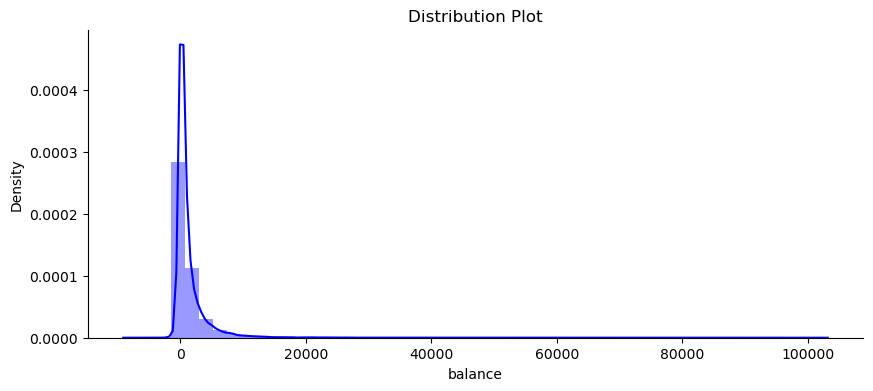

In [31]:
Box_plots(df["balance"],"blue")
hist_plots(df["balance"],"blue")
dist_plots(df["balance"],"blue")

### For day column

/Users/jinwen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


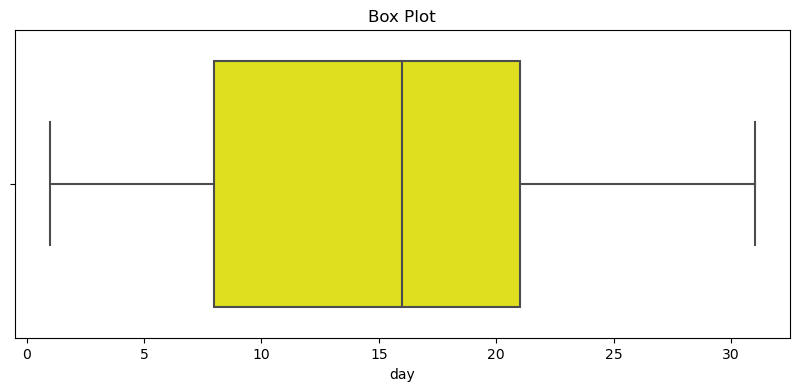

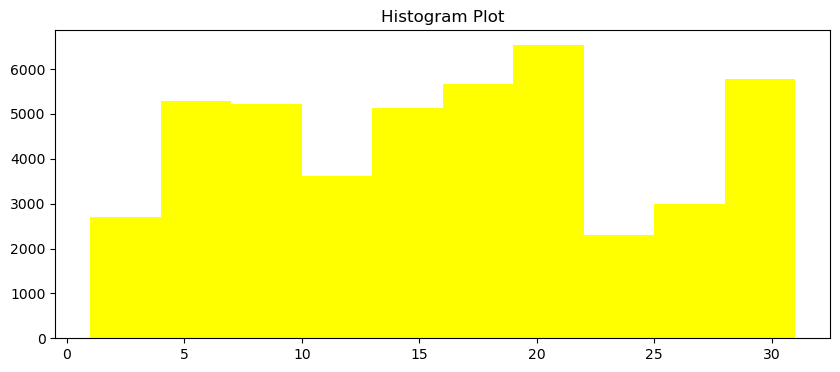

/Users/jinwen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


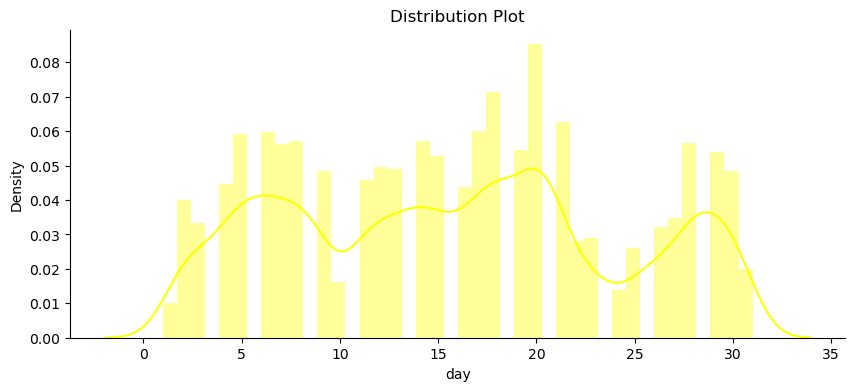

In [33]:
Box_plots(df["day"],"yellow")
hist_plots(df["day"],"yellow")
dist_plots(df["day"],"yellow")

### For Duration column

/Users/jinwen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


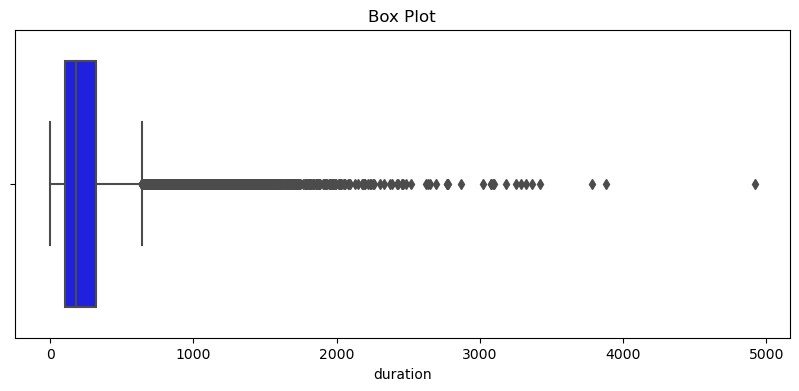

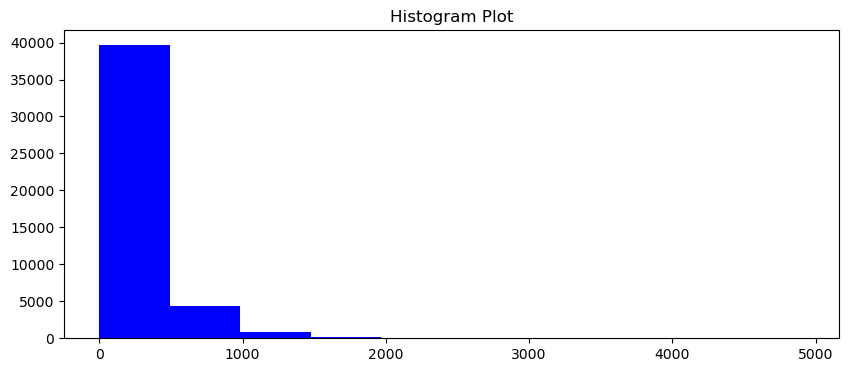

/Users/jinwen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


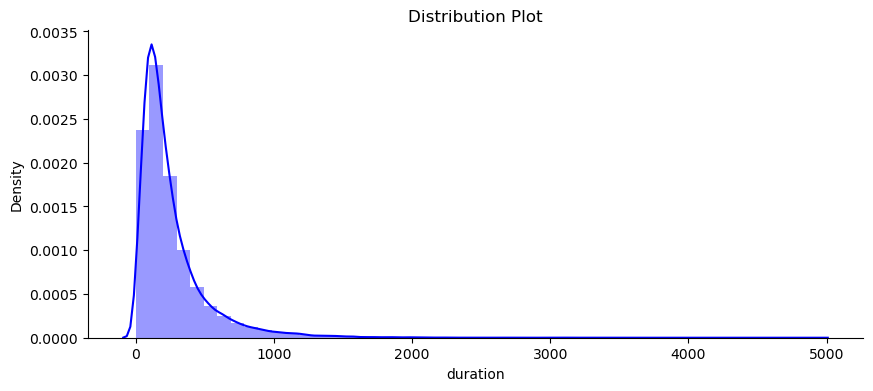

In [35]:
Box_plots(df["duration"],"blue")
hist_plots(df["duration"],"blue")
dist_plots(df["duration"],"blue")

/Users/jinwen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


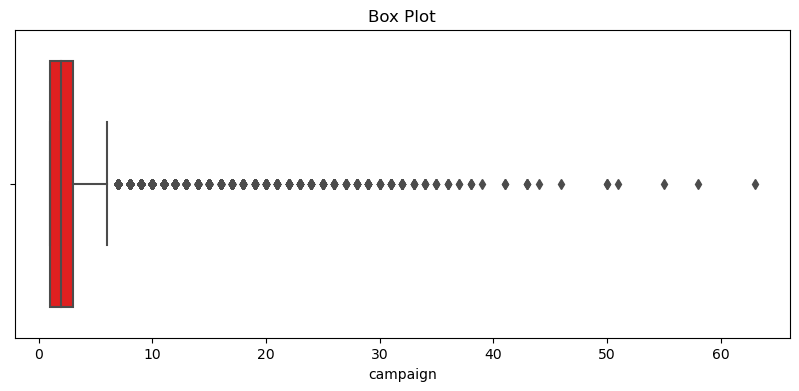

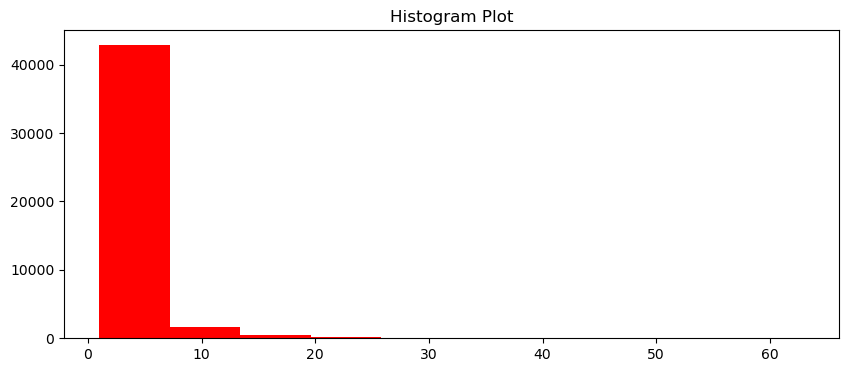

/Users/jinwen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


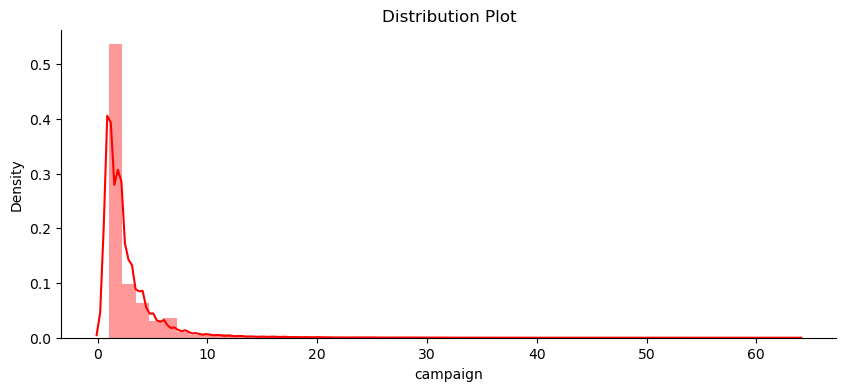

In [37]:
Box_plots(df["campaign"],"red")
hist_plots(df["campaign"],"red")
dist_plots(df["campaign"],"red")

/Users/jinwen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


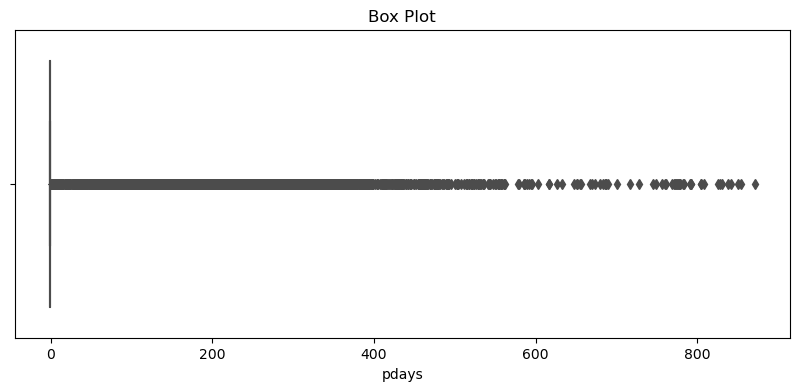

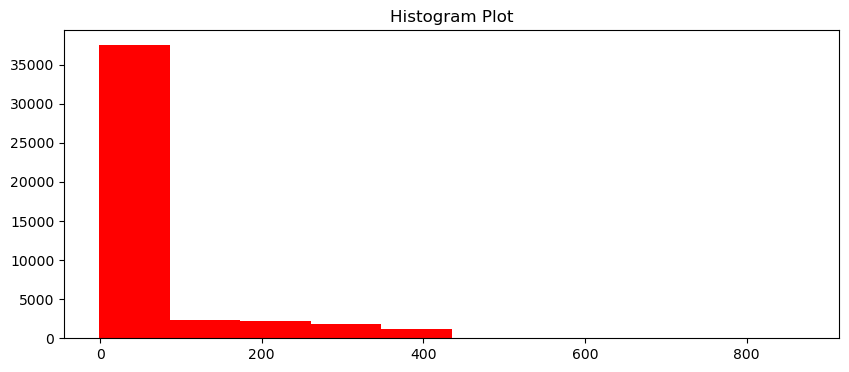

/Users/jinwen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


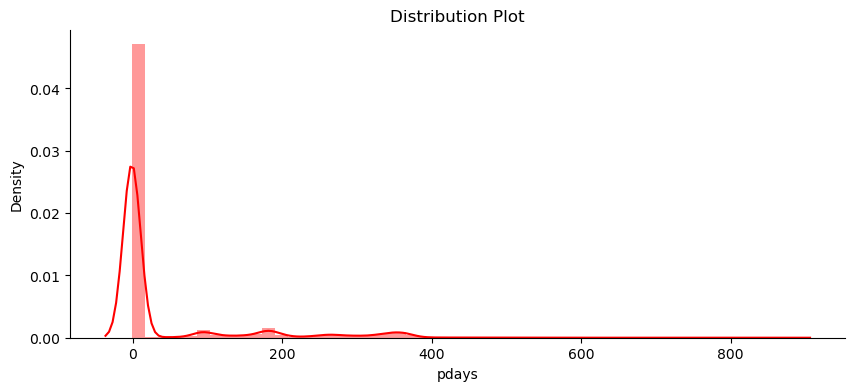

In [38]:
Box_plots(df["pdays"],"red")
hist_plots(df["pdays"],"red")
dist_plots(df["pdays"],"red")

/Users/jinwen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


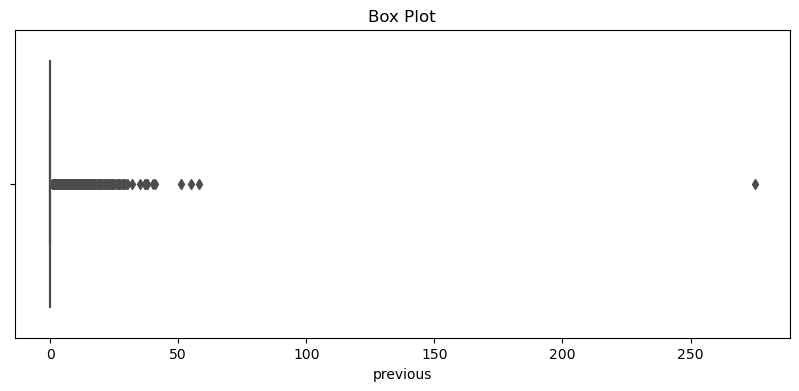

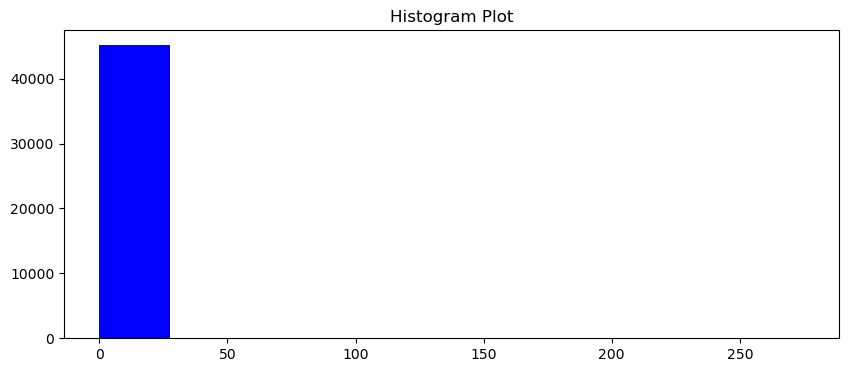

/Users/jinwen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


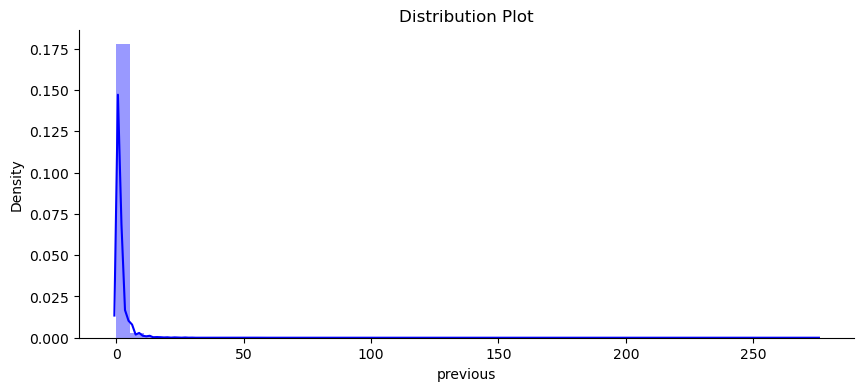

In [39]:
Box_plots(df["previous"],"blue")
hist_plots(df["previous"],"blue")
dist_plots(df["previous"],"blue")

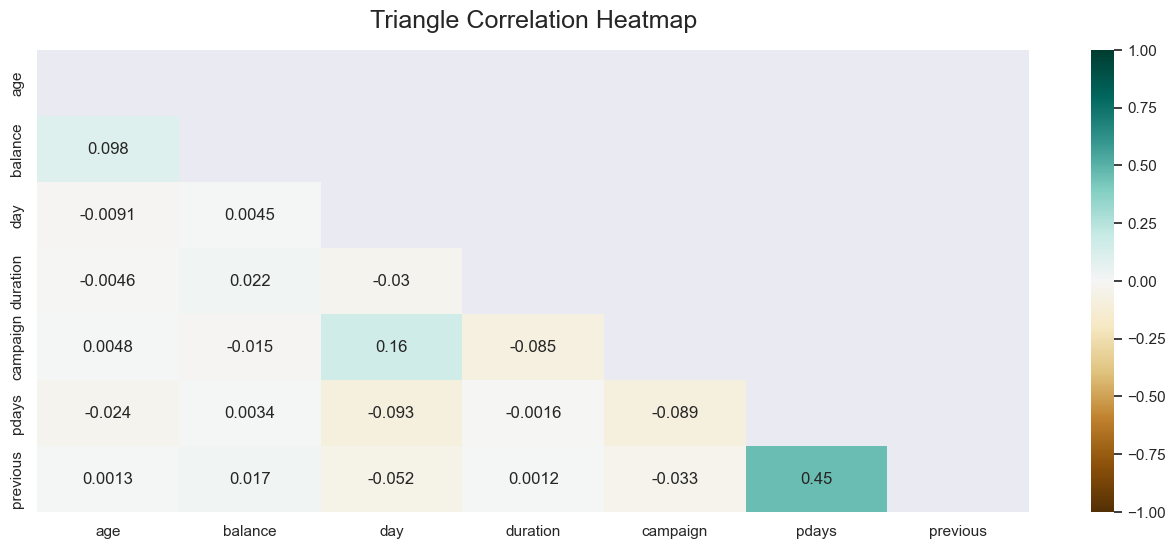

In [59]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

### Duration Analysis

In [45]:
bins= [0,200,400,600,800,1000,1200,5000]
labels = ['0-200','200-400','400-600','600-800','800-1000','1000-1200','1200-5000']
df['DurGroup'] = pd.cut(df['duration'], bins=bins, labels=labels, right=False)


In [46]:
df_duration=df.groupby(['y','DurGroup'])["job"].agg(['count'])
df_duration

count
y   DurGroup        
no  0-200      23718
    200-400    10885
    400-600     3111
    600-800     1125
    800-1000     403
    1000-1200    211
    1200-5000    215
yes 0-200        874
    200-400     1596
    400-600      958
    600-800      727
    800-1000     466
    1000-1200    288
    1200-5000    346

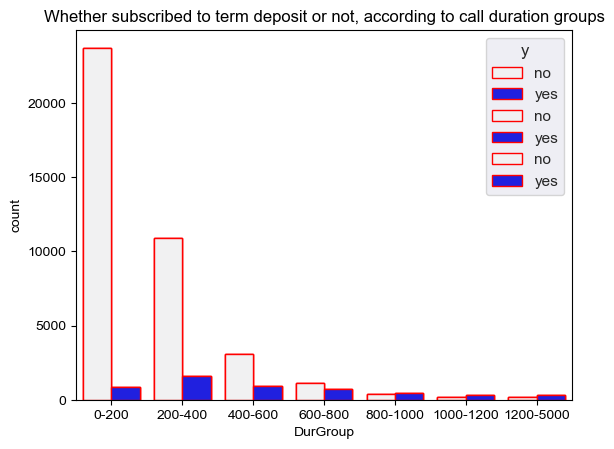

In [49]:
df_durr=df_duration.reset_index()

plt.title("Whether subscribed to term deposit or not, according to call duration groups")
sns.set(rc = {'figure.figsize':(20,10)})
sns.barplot(data=df_durr,hue="y",x="DurGroup",y="count",color="blue", edgecolor='red')
plt.show()

### Education Analysis

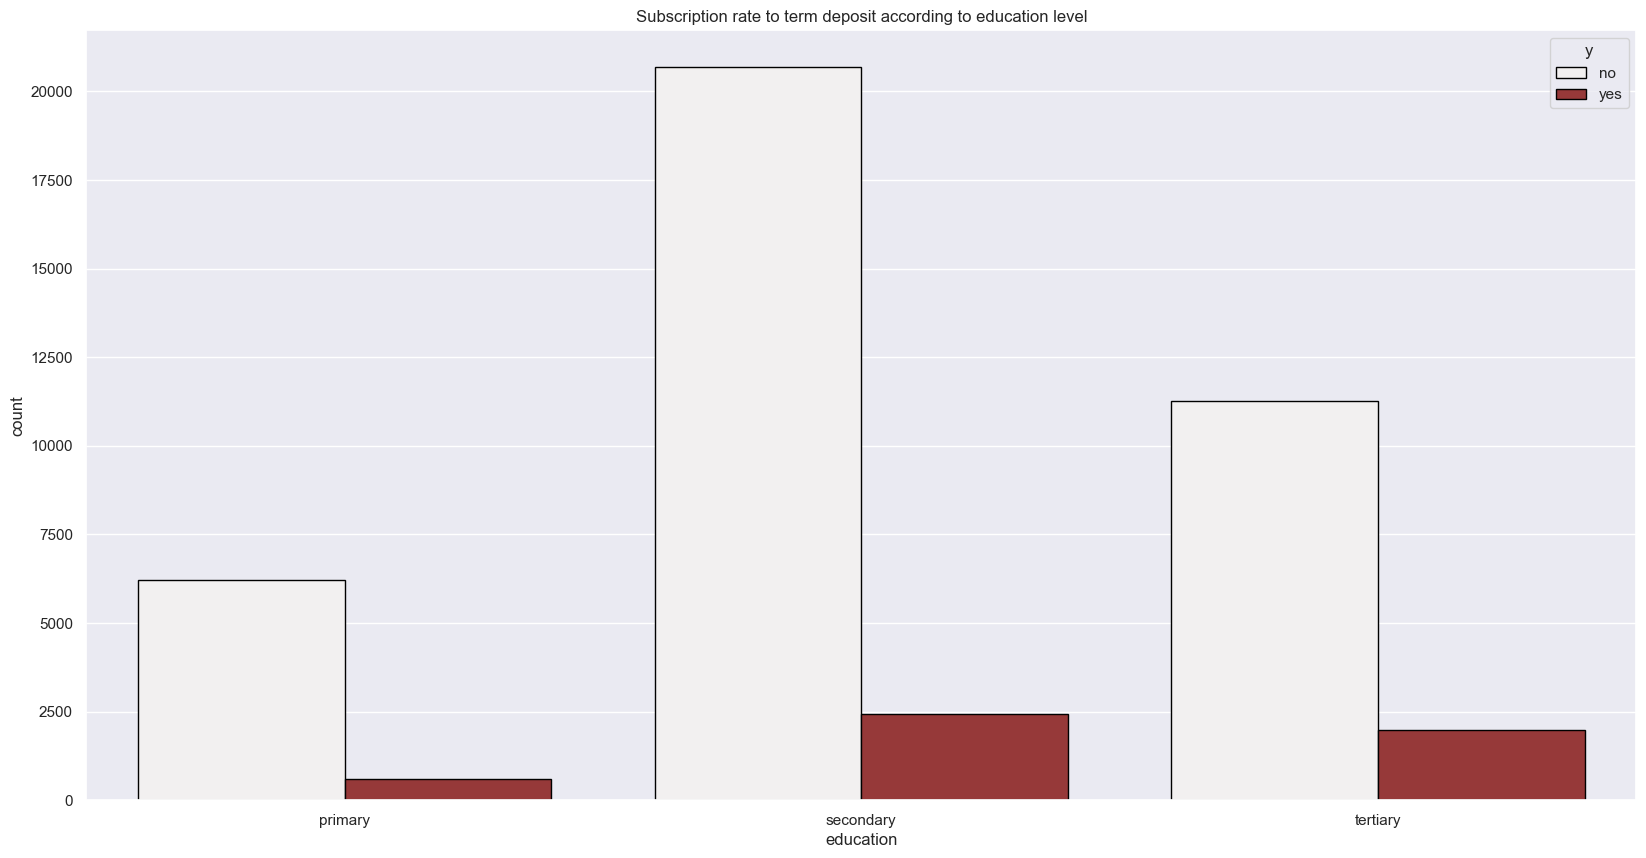

In [58]:
job_count=df.groupby(["y","education"])["job"].agg(["count"])
job_countt=job_count.reset_index()
plt.figure(figsize=(20,10))
plt.title("Subscription rate to term deposit according to education level")
sns.barplot(data=job_countt,hue="y",x="education",y="count",color="brown", edgecolor='black')
plt.show()

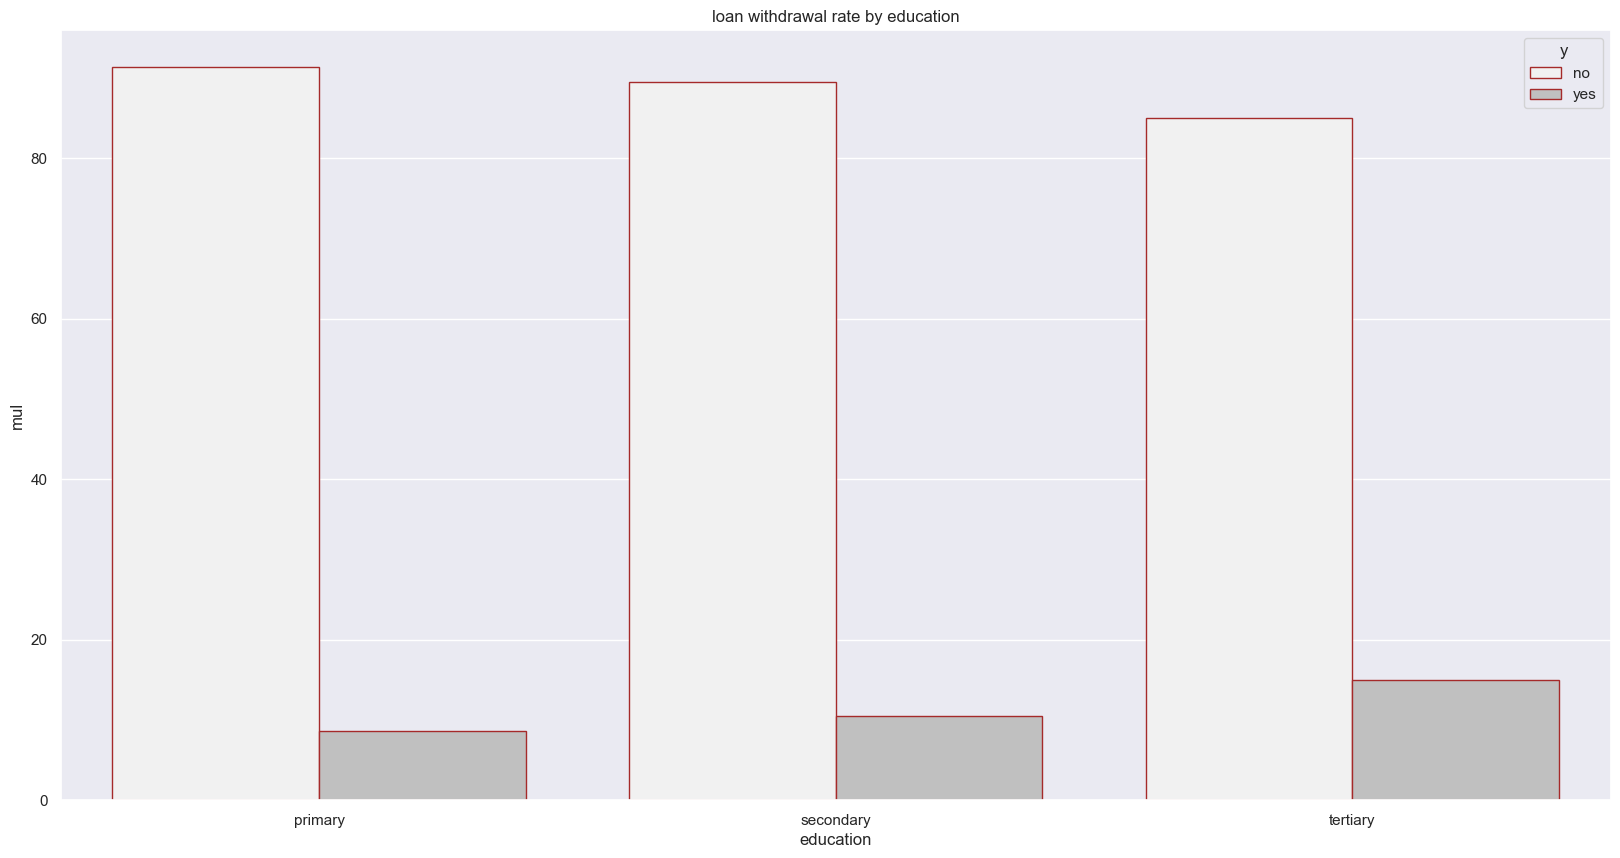

In [57]:
education_mul=df.groupby("education")["y"].value_counts(normalize=True).mul(100)
education_muldf=pd.DataFrame(education_mul)
education_muldf.rename(columns = {'y':'mul'}, inplace = True)
education_muldf=education_muldf.reset_index()
plt.figure(figsize=(20,10))
plt.title("loan withdrawal rate by education")
sns.barplot(data=education_muldf,hue="y",x="education",y="mul",color="silver", edgecolor='brown')
plt.show()

## Final Recommendation

We can use the eduacation and pdays, duration,balance, age, and job data to make a model for our data to predict the probablity of y.

## Model Selection and Building

In [90]:
#data overview
df = df.drop('DurGroup', axis=1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [91]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

In [92]:
categories = ['job',
            'marital',
            'education',
            'default',
            'housing',
            'loan',
            'contact',
            'month',
            'poutcome']

In [93]:
one_hot_enc = pd.get_dummies(df, columns = categories)

In [94]:
one_hot_enc.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,0
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,0
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,0
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,0,1,0,0,0,0,0,0
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,0


In [95]:
df['y']

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [96]:
one_hot_enc["y"].replace({"yes":1, "no":0}, inplace=True)
one_hot_enc['y']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(one_hot_enc, train_size = 0.8, random_state = 42)
data_train.shape, data_test.shape

((36168, 48), (9043, 48))

In [98]:
y_train = data_train.pop('y')
X_train = data_train

In [99]:
X_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
3344,41,849,15,72,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
17965,49,1415,30,269,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
18299,42,3842,31,130,4,-1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
10221,37,-119,11,375,11,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32192,56,3498,15,264,2,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
y_train.head()

3344     0
17965    0
18299    0
10221    0
32192    1
Name: y, dtype: int64

In [101]:
y_test = data_test.pop('y')
X_test = data_test

### Jinwen Li's models

### Model 1: Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=6000,random_state=42,n_jobs=-1)
model.fit(X_train, y_train)

LogisticRegression(max_iter=6000, n_jobs=-1, random_state=42)

In [108]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
print(f'Accuracy of the Logistic Regression model is {accuracy*100:.2f}%')

Accuracy of the Logistic Regression model is 90.03%


### Model 2: Supoort Vector Classification

In [111]:
from scipy.stats import reciprocal, uniform
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [112]:
from sklearn.model_selection import RandomizedSearchCV

ksvc = Pipeline([('scaler', StandardScaler()),
                   ('svc', SVC(max_iter=50000))
               ])

param_distributions = {"svc__gamma": reciprocal(0.001, 0.1),
                       
                       "svc__C": uniform(1, 10)
                       }
rnd_search_ksvc = RandomizedSearchCV(ksvc, param_distributions,
                                       cv=3, n_iter=10,
                                    n_jobs=-1,
                                       random_state=42)

In [113]:
rnd_search_ksvc.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svc', SVC(max_iter=50000))]),
                   n_jobs=-1,
                   param_distributions={'svc__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fac10c19460>,
                                        'svc__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fabf35703a0>},
                   random_state=42)

In [115]:
print(rnd_search_ksvc.best_estimator_)
print(rnd_search_ksvc.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=4.042422429595377, gamma=0.011207606211860567,
                     max_iter=50000))])
0.9028146427781465


In [116]:
y_pred = rnd_search_ksvc.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.9039035718235099

In [122]:
print('Accuracy of the Support Vector Regression model is 0.9039')

Accuracy of the Support Vector Regression model is 0.9039


### Model 3: Gradient Boosting Classifier

In [117]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(max_depth=2,n_estimators=10,
                                learning_rate=0.25,random_state=42)
gbc.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.25, max_depth=2, n_estimators=10,
                           random_state=42)

In [118]:
y_pred=gbc.predict(X_test)
accuracy_score(y_test, y_pred)

0.8961627778392126

In [121]:
print(f'Accuracy of the Gradient Boosting Classifier model is {accuracy_score(y_test, y_pred)}')

Accuracy of the Gradient Boosting Classifier model is 0.8961627778392126


## Conclusion
Therefore, we should choose Supoort Vector Classification as our model for the best prediction preformance.

### Kemal's models

In [30]:
# model = LogisticRegression(max_iter=5000)
# model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [31]:
# y_pred = model.predict(X_test)

In [42]:
# from sklearn.metrics import accuracy_score

# accuracy = accuracy_score(y_pred = y_pred, y_true = y_test)
# print(f'Accuracy of the Logistic Regression model is {accuracy*100:.2f}%')

Accuracy of the Logistic Regression model is 90.87%


In [33]:
# Random Forest Classifier - Ensemble Model
# from sklearn.ensemble import RandomForestClassifier

In [34]:
# randomForest = RandomForestClassifier()
# randomForest.fit(X_train, y_train)
# random_forest_predictions = randomForest.predict(X_test)
# print("Predicted value: ", random_forest_predictions[:10])
# print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 1 0 0 0 0 0]
Actual value:  29203    0
4243     0
2953     0
39970    1
37999    0
22391    0
1793     0
13687    0
24343    0
30797    0
Name: y, dtype: int64


In [35]:
# # Accuracy of the model
# accuracy = accuracy_score(y_pred = random_forest_predictions, y_true = y_test)
# print(f'Accuracy of the Random Forest Classifier model is {accuracy*100:.2f}%')

Accuracy of the Random Forest Classifier model is 91.15%


In [36]:
# # Decision Tree Classifier
# from sklearn.tree import DecisionTreeClassifier

In [37]:
# decisionTree = DecisionTreeClassifier(random_state=21)
# decisionTree.fit(X_train, y_train)
# decision_tree_prediction = decisionTree.predict(X_test)
# print("Predicted value: ", decision_tree_prediction[:10])
# print("Actual value: ", y_test[:10])

Predicted value:  [1 0 0 0 1 0 0 0 0 0]
Actual value:  29203    0
4243     0
2953     0
39970    1
37999    0
22391    0
1793     0
13687    0
24343    0
30797    0
Name: y, dtype: int64


In [38]:
# # Accuracy of the model
# accuracy = accuracy_score(y_pred = decision_tree_prediction, y_true = y_test)
# print(f'Accuracy of the Decision Tree Classifier model is {accuracy*100:.2f}%')

Accuracy of the Decision Tree Classifier model is 89.16%


In [39]:
# Support Vector Classifier
from sklearn.svm import SVC

In [40]:
# svc = SVC()
# svc.fit(X_train, y_train)
# svc_predictions = svc.predict(X_test)
# print("Predicted value: ", svc_predictions[:10])
# print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 0 0 0 0 0 0]
Actual value:  29203    0
4243     0
2953     0
39970    1
37999    0
22391    0
1793     0
13687    0
24343    0
30797    0
Name: y, dtype: int64


In [41]:
# # Accuracy of the model
# accuracy = accuracy_score(y_pred = svc_predictions, y_true = y_test)
# print(f'Accuracy of the SVC model is {accuracy*100:.2f}%')

Accuracy of the SVC model is 89.72%


In [47]:
# # XGBoost 
# from xgboost import XGBClassifier

In [49]:
# xgb = XGBClassifier(random_state = 21)
# xgb.fit(X_train, y_train)
# xgb_predictions = xgb.predict(X_test)

In [50]:
# Accuracy of the model
# accuracy = accuracy_score(y_pred = xgb_predictions, y_true = y_test)
# print(f'Accuracy of the XGBoost model is {accuracy*100:.2f}%')

Accuracy of the XGBoost model is 91.50%


## Conclusion of our team
Therefore, We should choose XGBoost model as the best model, which has the prediction performance of 91.50%.